In [35]:
import numpy as np

a = [1,2,3,4,5,6,1,2,3,7,7,7]
np.quantile(a,0.7)

5.699999999999999

In [34]:
a.sort()
a

[1, 1, 2, 2, 3, 3, 4, 5, 6, 7, 7, 7]

In [3]:
import pandas as pd
import trading_vix_and_spy_utils
import numpy as np

In [4]:
#load data
index_data = pd.read_csv("^VIX.csv")
index_data = index_data.rename(columns = {"Date":"Date",\
                        "Open":"vix_index_open",\
                        "High":'vix_index_high',\
                        'Low':'vix_index_low',\
                        'Close':'vix_index_close',\
                        'Adj Close':'vix_index_adj_close',\
                        'Volume':'vix_index_volume'})

vix_price_data = pd.read_csv('VIXY.csv')
vix_price_data = vix_price_data.rename(columns = {"Date":"Date",\
                        "Open":"vix_price_open",\
                        "High":'vix_price_high',\
                        'Low':'vix_price_low',\
                        'Close':'vix_price_close',\
                        'Adj Close':'vix_price_adj_close',\
                        'Volume':'vix_price_volume'})

spy_price_data = pd.read_csv('SPY.csv')
spy_price_data = spy_price_data.rename(columns = {"Date":"Date",\
                        "Open":"spy_price_open",\
                        "High":'spy_price_high',\
                        'Low':'spy_price_low',\
                        'Close':'spy_price_close',\
                        'Adj Close':'spy_price_adj_close',\
                        'Volume':'spy_price_volume'})

total_data = pd.merge(index_data, vix_price_data, on="Date",how = 'inner')
total_data = pd.merge(total_data, spy_price_data, on="Date",how = 'inner')

In [5]:
total_data.columns

Index(['Date', 'vix_index_open', 'vix_index_high', 'vix_index_low',
       'vix_index_close', 'vix_index_adj_close', 'vix_index_volume',
       'vix_price_open', 'vix_price_high', 'vix_price_low', 'vix_price_close',
       'vix_price_adj_close', 'vix_price_volume', 'spy_price_open',
       'spy_price_high', 'spy_price_low', 'spy_price_close',
       'spy_price_adj_close', 'spy_price_volume'],
      dtype='object')

In [6]:
total_data

,Date,vix_index_open,vix_index_high,vix_index_low,vix_index_close,vix_index_adj_close,vix_index_volume,vix_price_open,vix_price_high,vix_price_low,vix_price_close,vix_price_adj_close,vix_price_volume,spy_price_open,spy_price_high,spy_price_low,spy_price_close,spy_price_adj_close,spy_price_volume
0,2011-01-04,17.340000,18.240000,17.330000,17.379999,17.379999,0,31656.000000,32540.000000,31656.000000,31692.000000,31692.000000,281,127.330002,127.370003,126.190002,126.980003,103.722198,137409700
1,2011-01-05,17.809999,17.950001,16.860001,17.020000,17.020000,0,32020.000000,32040.000000,30872.000000,31020.000000,31020.000000,186,126.580002,127.720001,126.459999,127.639999,104.261322,133975300
2,2011-01-06,16.799999,17.559999,16.790001,17.400000,17.400000,0,30976.000000,31472.000000,30748.000000,31152.000000,31152.000000,208,127.690002,127.830002,127.010002,127.389999,104.057114,122519000
3,2011-01-07,17.309999,18.070000,16.570000,17.139999,17.139999,0,30896.000000,32004.000000,30472.000000,31216.000000,31216.000000,108,127.559998,127.769997,126.150002,127.139999,103.852882,156034600
4,2011-01-10,18.350000,18.629999,17.540001,17.540001,17.540001,0,31856.000000,32348.000000,31104.000000,31152.000000,31152.000000,176,126.580002,127.160004,126.199997,126.980003,103.722198,122401700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2633,2021-06-22,17.910000,18.320000,15.760000,16.660000,16.660000,0,26.799999,26.910000,25.240000,25.270000,25.270000,3390800,420.850006,424.000000,420.079987,423.109985,423.109985,57700300
2634,2021-06-23,16.250000,16.840000,14.860000,16.320000,16.320000,0,24.950001,25.020000,24.520000,24.770000,24.770000,2640000,423.190002,424.049988,422.510010,422.600006,422.600006,49445400
2635,2021-06-24,15.990000,16.049999,14.190000,15.970000,15.970000,0,24.150000,24.420000,24.049999,24.230000,24.230000,2550700,424.890015,425.549988,424.619995,425.100006,425.100006,45110300
2636,2021-06-25,16.040001,16.170000,15.210000,15.620000,15.620000,0,24.200001,24.450001,23.850000,23.870001,23.870001,1932200,425.899994,427.089996,425.549988,426.609985,426.609985,58067900


In [9]:
#build features
#compute the exponential moving average
mv_10 = total_data['vix_index_adj_close'].ewm(span = 10).mean()
mv_20 = total_data['vix_index_adj_close'].ewm(span = 20).mean()
mv_30 = total_data['vix_index_adj_close'].ewm(span = 30).mean()
mv_50 = total_data['vix_index_adj_close'].ewm(span = 50).mean()
mv_100 = total_data['vix_index_adj_close'].ewm(span = 100).mean()

spot_to_mv_10 = total_data['vix_index_adj_close']/mv_10
spot_to_mv_20 = total_data['vix_index_adj_close']/mv_20
spot_to_mv_30 = total_data['vix_index_adj_close']/mv_30
spot_to_mv_50 = total_data['vix_index_adj_close']/mv_50
spot_to_mv_100 = total_data['vix_index_adj_close']/mv_100

vix_measure = spot_to_mv_10+spot_to_mv_20+spot_to_mv_30+spot_to_mv_50+spot_to_mv_100
vix_measure_list = vix_measure.tolist()


index_feature_dataframe = pd.DataFrame()
index_feature_dataframe['vix_price_adj_close'] = total_data['vix_price_adj_close'][1:] #[1:] for matching counting_days
index_feature_dataframe['vix_adj_close'] = total_data['vix_index_adj_close'][1:]
index_feature_dataframe['mv_ratio'] = vix_measure_list[1:]
threshold_list = [5,6,7]
for threshold in threshold_list:
    counting_days = trading_vix_and_spy_utils.day_counter_helper(vix_measure_list,threshold)
    index_feature_dataframe['days_since_'+str(threshold)] = counting_days

index_feature_dataframe = index_feature_dataframe.iloc[-1000:] #there may be a vix regime change in 2018/1??
index_feature_dataframe = index_feature_dataframe.reset_index(drop=True)

In [10]:
index_feature_dataframe

,vix_price_adj_close,vix_adj_close,mv_ratio,days_since_5,days_since_6,days_since_7
0,170.080002,11.11,4.999308,7,37,170
1,169.600006,10.89,4.906989,8,38,171
2,164.960007,10.30,4.666771,9,39,172
3,163.199997,9.90,4.520951,10,40,173
4,160.000000,9.51,4.386410,11,41,174
...,...,...,...,...,...,...
995,25.270000,16.66,4.535959,3,29,102
996,24.770000,16.32,4.476456,4,30,103
997,24.230000,15.97,4.416975,5,31,104
998,23.870001,15.62,4.359830,6,32,105


In [11]:
df = pd.DataFrame()

In [12]:
df['a'] = [[1,2],[3,4]]
df

,a
0,"[1, 2]"
1,"[3, 4]"


In [13]:
total_data.shape

(2638, 19)

In [14]:
total_data['spy_price_adj_close'].iloc[0:3].tolist()

[103.722198, 104.261322, 104.057114]

In [15]:
total_data.tail()

,Date,vix_index_open,vix_index_high,vix_index_low,vix_index_close,vix_index_adj_close,vix_index_volume,vix_price_open,vix_price_high,vix_price_low,vix_price_close,vix_price_adj_close,vix_price_volume,spy_price_open,spy_price_high,spy_price_low,spy_price_close,spy_price_adj_close,spy_price_volume
2633,2021-06-22,17.910000,18.320000,15.76,16.66,16.66,0,26.799999,26.910000,25.240000,25.270000,25.270000,3390800,420.850006,424.000000,420.079987,423.109985,423.109985,57700300
2634,2021-06-23,16.250000,16.840000,14.86,16.32,16.32,0,24.950001,25.020000,24.520000,24.770000,24.770000,2640000,423.190002,424.049988,422.510010,422.600006,422.600006,49445400
2635,2021-06-24,15.990000,16.049999,14.19,15.97,15.97,0,24.150000,24.420000,24.049999,24.230000,24.230000,2550700,424.890015,425.549988,424.619995,425.100006,425.100006,45110300
2636,2021-06-25,16.040001,16.170000,15.21,15.62,15.62,0,24.200001,24.450001,23.850000,23.870001,23.870001,1932200,425.899994,427.089996,425.549988,426.609985,426.609985,58067900
2637,2021-06-28,16.070000,16.459999,15.39,15.76,15.76,0,23.700001,24.230000,23.590000,23.910000,23.910000,1824803,427.170013,427.640015,425.890015,427.470001,427.470001,49651109


In [16]:
spy_data_per_day = 1
spy_max_observation_history = 100
spy_temp_data_max_rows = total_data.shape[0]-spy_max_observation_history*spy_data_per_day+1
spy_temp_data = np.zeros((spy_temp_data_max_rows,spy_max_observation_history))

for end_interval_index in range(total_data.shape[0]-spy_temp_data_max_rows+1,total_data.shape[0]+1):
    price_history = total_data['spy_price_adj_close'][end_interval_index-spy_data_per_day*spy_max_observation_history\
                                                     :end_interval_index]
    spy_temp_data[end_interval_index-spy_data_per_day*spy_max_observation_history,:] = price_history

In [17]:
spy_observation_data_list = []
for row_index in range(0,spy_temp_data.shape[0]):
    spy_observation_data_list.append(spy_temp_data[row_index,:].tolist())

In [18]:
a = [1,2,3,4,5]
a[-3:]

[3, 4, 5]

In [19]:
index_feature_dataframe['spy_observation'] = spy_observation_data_list[-1000:]

In [20]:
index_feature_dataframe

,vix_price_adj_close,vix_adj_close,mv_ratio,days_since_5,days_since_6,days_since_7,spy_observation
0,170.080002,11.11,4.999308,7,37,170,"[217.161728, 216.976868, 217.318909, 218.61308..."
1,169.600006,10.89,4.906989,8,38,171,"[216.976868, 217.318909, 218.613083, 218.41893..."
2,164.960007,10.30,4.666771,9,39,172,"[217.318909, 218.613083, 218.41893, 218.566818..."
3,163.199997,9.90,4.520951,10,40,173,"[218.613083, 218.41893, 218.566818, 218.844162..."
4,160.000000,9.51,4.386410,11,41,174,"[218.41893, 218.566818, 218.844162, 219.186203..."
...,...,...,...,...,...,...,...
995,25.270000,16.66,4.535959,3,29,102,"[368.861908, 375.001801, 380.304413, 380.60342..."
996,24.770000,16.32,4.476456,4,30,103,"[375.001801, 380.304413, 380.603424, 384.92926..."
997,24.230000,15.97,4.416975,5,31,104,"[380.304413, 380.603424, 384.92926, 386.444305..."
998,23.870001,15.62,4.359830,6,32,105,"[380.603424, 384.92926, 386.444305, 389.235168..."


In [21]:
index_feature_dataframe['spy_price'] = total_data['spy_price_adj_close'].iloc[-1000:].tolist()

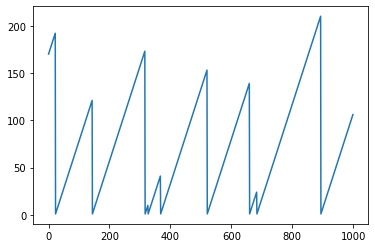

In [22]:
import matplotlib.pyplot as plt


plt.plot(index_feature_dataframe['days_since_7'])
plt.show()

In [23]:
total_data['spy_price_adj_close'][-1000:]

1638    226.120636
1639    225.952713
1640    227.650711
1641    228.033203
1642    229.096802
           ...    
2633    423.109985
2634    422.600006
2635    425.100006
2636    426.609985
2637    427.470001
Name: spy_price_adj_close, Length: 1000, dtype: float64

In [24]:
index_feature_dataframe

,vix_price_adj_close,vix_adj_close,mv_ratio,days_since_5,days_since_6,days_since_7,spy_observation,spy_price
0,170.080002,11.11,4.999308,7,37,170,"[217.161728, 216.976868, 217.318909, 218.61308...",226.120636
1,169.600006,10.89,4.906989,8,38,171,"[216.976868, 217.318909, 218.613083, 218.41893...",225.952713
2,164.960007,10.30,4.666771,9,39,172,"[217.318909, 218.613083, 218.41893, 218.566818...",227.650711
3,163.199997,9.90,4.520951,10,40,173,"[218.613083, 218.41893, 218.566818, 218.844162...",228.033203
4,160.000000,9.51,4.386410,11,41,174,"[218.41893, 218.566818, 218.844162, 219.186203...",229.096802
...,...,...,...,...,...,...,...,...
995,25.270000,16.66,4.535959,3,29,102,"[368.861908, 375.001801, 380.304413, 380.60342...",423.109985
996,24.770000,16.32,4.476456,4,30,103,"[375.001801, 380.304413, 380.603424, 384.92926...",422.600006
997,24.230000,15.97,4.416975,5,31,104,"[380.304413, 380.603424, 384.92926, 386.444305...",425.100006
998,23.870001,15.62,4.359830,6,32,105,"[380.603424, 384.92926, 386.444305, 389.235168...",426.609985


In [25]:
index_feature_dataframe['spy_price']

0      226.120636
1      225.952713
2      227.650711
3      228.033203
4      229.096802
          ...    
995    423.109985
996    422.600006
997    425.100006
998    426.609985
999    427.470001
Name: spy_price, Length: 1000, dtype: float64

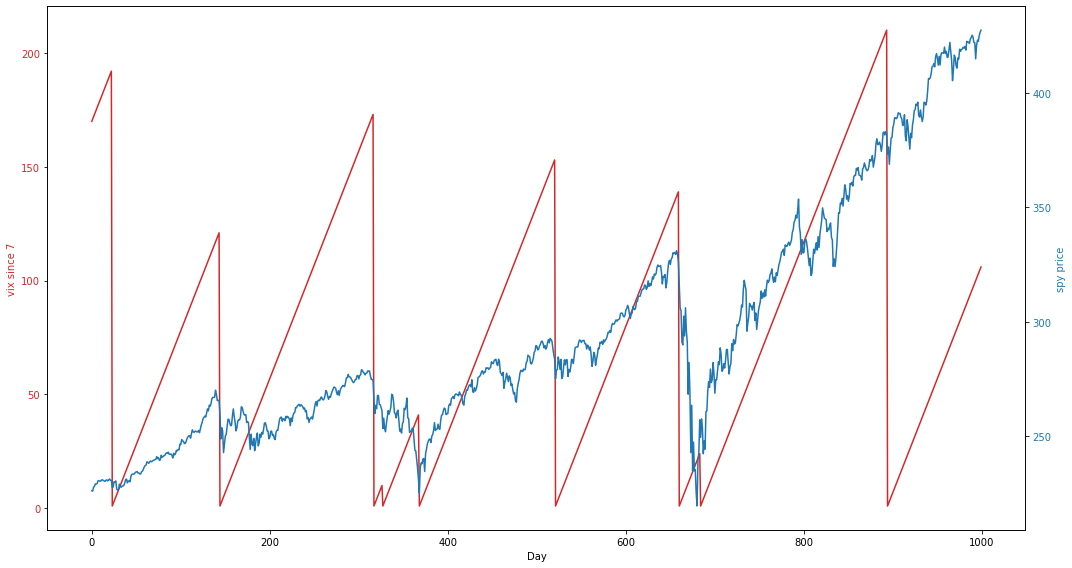

In [26]:
plt.rcParams["figure.figsize"] = (15,8)

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Day')
ax1.set_ylabel('vix since 7', color=color)
ax1.plot(index_feature_dataframe['days_since_7'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('spy price', color=color)  # we already handled the x-label with ax1
ax2.plot(index_feature_dataframe['spy_price'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

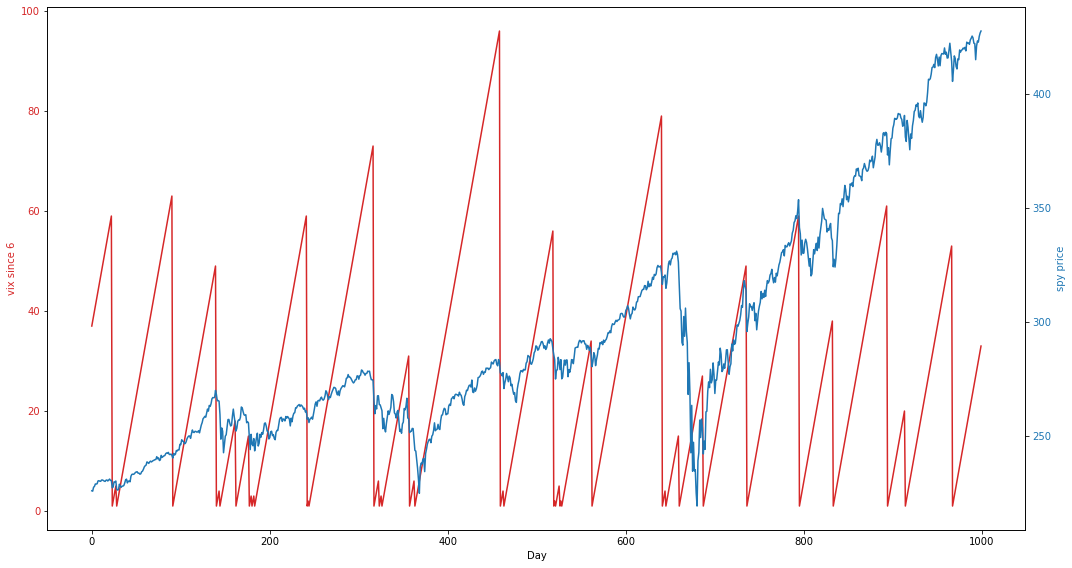

In [27]:
plt.rcParams["figure.figsize"] = (15,8)

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Day')
ax1.set_ylabel('vix since 6', color=color)
ax1.plot(index_feature_dataframe['days_since_6'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('spy price', color=color)  # we already handled the x-label with ax1
ax2.plot(index_feature_dataframe['spy_price'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

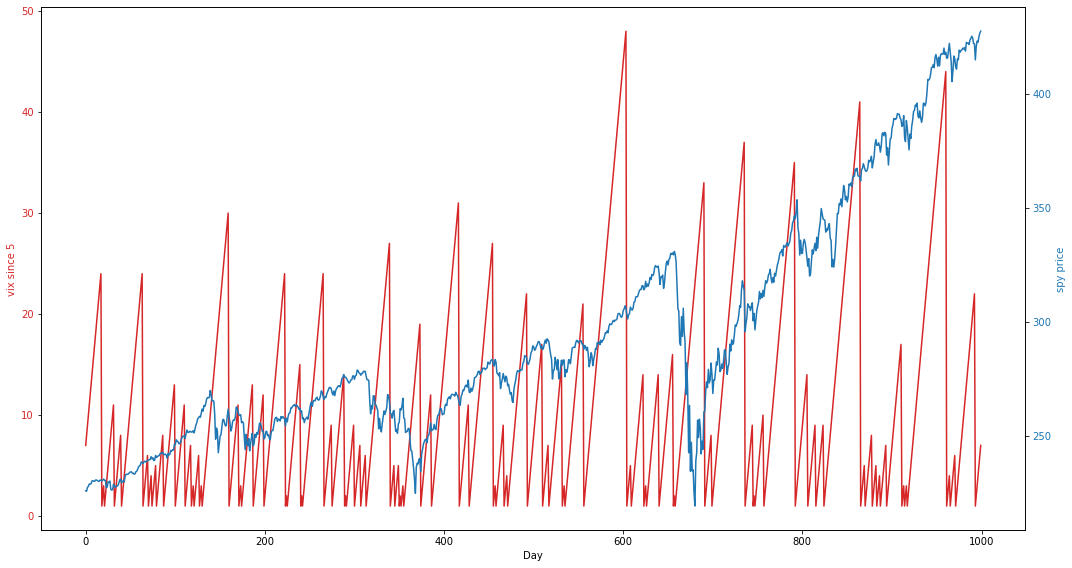

In [28]:
plt.rcParams["figure.figsize"] = (15,8)

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Day')
ax1.set_ylabel('vix since 5', color=color)
ax1.plot(index_feature_dataframe['days_since_5'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('spy price', color=color)  # we already handled the x-label with ax1
ax2.plot(index_feature_dataframe['spy_price'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [72]:
spy_temp_data

array([[103.722198, 104.261322, 104.057114],
       [104.261322, 104.057114, 103.852882],
       [104.057114, 103.852882, 103.722198],
       ...,
       [423.109985, 422.600006, 425.100006],
       [422.600006, 425.100006, 426.609985],
       [425.100006, 426.609985, 427.470001]])

In [67]:
total_data['spy_price_adj_close'][-10:]

2628    424.480011
2629    422.109985
2630    421.970001
2631    414.920013
2632    420.859985
2633    423.109985
2634    422.600006
2635    425.100006
2636    426.609985
2637    427.470001
Name: spy_price_adj_close, dtype: float64

In [73]:
total_data['spy_price_adj_close'][0:10]

0    103.722198
1    104.261322
2    104.057114
3    103.852882
4    103.722198
5    104.089745
6    105.029152
7    104.857582
8    105.617264
9    105.796959
Name: spy_price_adj_close, dtype: float64

In [84]:
#build features
#compute the exponential moving average
mv_10 = total_data['vix_index_adj_close'].ewm(span = 10).mean()
mv_20 = total_data['vix_index_adj_close'].ewm(span = 20).mean()
mv_30 = total_data['vix_index_adj_close'].ewm(span = 30).mean()
mv_50 = total_data['vix_index_adj_close'].ewm(span = 50).mean()
mv_100 = total_data['vix_index_adj_close'].ewm(span = 100).mean()

spot_to_mv_10 = total_data['vix_index_adj_close']/mv_10
spot_to_mv_20 = total_data['vix_index_adj_close']/mv_20
spot_to_mv_30 = total_data['vix_index_adj_close']/mv_30
spot_to_mv_50 = total_data['vix_index_adj_close']/mv_50
spot_to_mv_100 = total_data['vix_index_adj_close']/mv_100

vix_measure = spot_to_mv_10+spot_to_mv_20+spot_to_mv_30+spot_to_mv_50+spot_to_mv_100
vix_measure_list = vix_measure.tolist()


index_feature_dataframe = pd.DataFrame()
index_feature_dataframe['vix_price_adj_close'] = total_data['vix_price_adj_close'][1:] #[1:] for matching counting_days
index_feature_dataframe['vix_adj_close'] = total_data['vix_index_adj_close'][1:]
index_feature_dataframe['mv_ratio'] = vix_measure_list[1:]
threshold_list = [5,6,7]
for threshold in threshold_list:
    counting_days = trading_vix_utils.day_counter_helper(vix_measure_list,threshold)
    index_feature_dataframe['days_since_'+str(threshold)] = counting_days

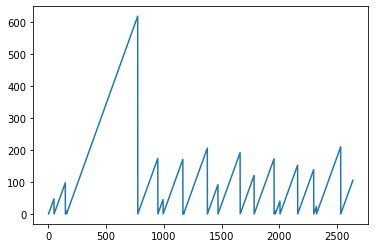

In [85]:
import matplotlib.pyplot as plt

plt.plot(index_feature_dataframe['days_since_7'])